
# Hand Written Digit Prediction- Classification Analysis

# Objective

The primary objective of a Handwritten Digit Prediction project is to develop a machine learning model that can accurately recognize and predict handwritten digits from 0 to 9¹. This involves using datasets like the MNIST or scikit-learn’s built-in “digits” dataset, which contain images of handwritten digits, each represented by a pixel matrix. The project typically includes steps such as data preprocessing, model training, evaluation, and prediction. It’s a fundamental project in the field of computer vision and machine learning, often serving as a stepping stone for more complex image recognition tasks.

# Data Source

MNIST Dataset:

    1. The MNIST dataset was developed by Yann LeCun, Corinna Cortes, and
       Christopher Burges.
    2. It serves as a benchmark for evaluating machine learning models on the
       handwritten digit classification problem.
    3. The dataset consists of 28x28-pixel images of handwritten digits (0 to
       9).
    4. Each image is normalized in size and centered, making it ideal for model
       evaluation.
    5. The standard split of the dataset includes 60,000 training images and  
       10, 000 test images.
    6. The goal is to predict the correct digit class for each image.
    7. State-of-the-art models achieve a prediction error of approximately 0.2%
       using large convolutional neural networks (CNNs) 1.

CNNs (Convolutional Neural Networks):

    1. CNNs are a type of deep learning architecture commonly used for image
       recognition tasks.
    2. They excel at capturing spatial patterns and hierarchies in image data.
    3. In the context of handwritten digit prediction, CNNs learn to recognize
       features like edges, corners, and shapes within the digit images.
    4. Researchers and practitioners often use CNNs to achieve high accuracy on
       the MNIST dataset 1

# Import Library

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
from sklearn.datasets import load_digits


In [8]:
df = load_digits()

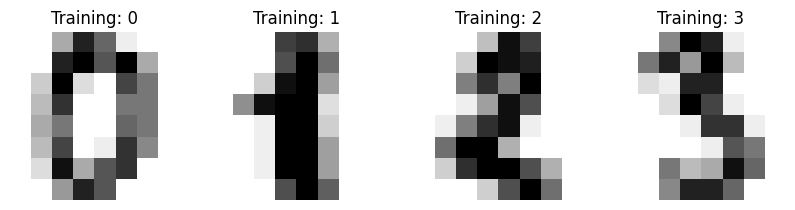

In [9]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10,3))
for ax, image, label in zip(axes, df.images, df.target):
  ax.set_axis_off()
  ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
  ax.set_title("Training: %i" %label)

# Data Preprocessing

Flatten image

In [10]:
df.images.shape

(1797, 8, 8)

In [11]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [12]:
df.images[0].shape

(8, 8)

In [13]:
len(df.images)

1797

In [15]:
n_samples = len(df.images)
data = df.images.reshape((n_samples, -1))

In [16]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [17]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [18]:
data[0].shape

(64,)

In [19]:
data.shape

(1797, 64)

In [20]:
data.min()

0.0

In [21]:
data.max()

16.0

In [22]:
data = data/16

In [23]:
data.min()

0.0

In [24]:
data.max()

1.0

In [25]:
data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

# Train Test Split Data

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x_train, x_test, y_train, y_test = train_test_split(data, df.target, test_size=0.3)

In [28]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

# **Random Forest Model**


In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
rf = RandomForestClassifier()

In [31]:
rf.fit(x_train, y_train)

RandomForestClassifier()

# Predict Test Data

In [32]:
y_pred = rf.predict(x_test)

In [34]:
y_pred

array([9, 3, 6, 8, 2, 8, 2, 4, 0, 8, 7, 3, 1, 1, 3, 4, 9, 1, 0, 0, 1, 9,
       8, 0, 9, 9, 4, 3, 4, 9, 2, 3, 7, 1, 6, 0, 2, 9, 4, 3, 2, 7, 5, 3,
       1, 2, 4, 5, 9, 6, 3, 2, 0, 9, 7, 8, 2, 2, 0, 3, 6, 7, 2, 8, 8, 1,
       3, 8, 2, 6, 3, 0, 4, 2, 3, 2, 2, 6, 8, 4, 5, 9, 8, 1, 8, 3, 7, 2,
       4, 6, 1, 5, 4, 6, 2, 6, 4, 2, 4, 1, 2, 8, 1, 0, 8, 0, 1, 8, 8, 7,
       9, 3, 8, 6, 8, 8, 8, 2, 0, 6, 4, 5, 0, 3, 5, 0, 8, 5, 2, 7, 9, 1,
       5, 4, 8, 5, 7, 1, 2, 4, 4, 0, 4, 6, 4, 6, 1, 3, 6, 3, 6, 4, 6, 0,
       7, 7, 6, 0, 5, 1, 7, 5, 7, 4, 3, 3, 2, 0, 8, 3, 8, 5, 3, 9, 9, 8,
       6, 2, 3, 8, 5, 5, 7, 3, 8, 1, 7, 6, 9, 8, 2, 5, 1, 5, 7, 8, 6, 2,
       7, 7, 3, 8, 7, 1, 9, 2, 3, 3, 9, 6, 3, 9, 7, 3, 8, 5, 7, 6, 9, 9,
       8, 3, 9, 5, 3, 3, 6, 3, 8, 8, 9, 3, 5, 0, 4, 4, 5, 7, 0, 6, 2, 5,
       7, 1, 8, 0, 4, 6, 2, 2, 3, 5, 2, 7, 6, 9, 0, 4, 0, 5, 0, 9, 1, 9,
       2, 4, 6, 0, 5, 2, 7, 0, 9, 5, 5, 4, 6, 0, 8, 2, 6, 8, 4, 6, 6, 7,
       8, 7, 7, 8, 3, 3, 4, 8, 7, 3, 0, 5, 9, 2, 5,

# Model Accuracy

In [35]:
from sklearn.metrics import confusion_matrix, classification_report

In [36]:
confusion_matrix(y_test, y_pred)

array([[52,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 43,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 56,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 67,  0,  1,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 53,  0,  0,  2,  0,  0],
       [ 0,  0,  0,  0,  0, 49,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0, 49,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 55,  0,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  1, 57,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  1, 49]])

In [37]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        52
           1       1.00      1.00      1.00        43
           2       1.00      1.00      1.00        56
           3       0.99      0.97      0.98        69
           4       0.98      0.96      0.97        55
           5       0.98      1.00      0.99        49
           6       1.00      0.98      0.99        50
           7       0.93      0.96      0.95        57
           8       0.98      0.98      0.98        58
           9       0.98      0.96      0.97        51

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540

